In [2]:
! pip install matplotlib
! pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Gustavo\OneDrive\Documentos\GitHub\DataScienceGui\01dadosevisualizacao\ml-latest-small\ratings.csv


<Axes: >

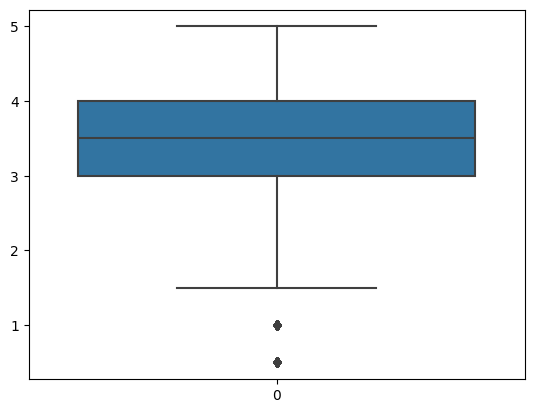

In [7]:
import pandas as pd
from pathlib import Path
import seaborn as sns

# colunas sao atributos/ chaves de dicionarios no dataframe
PATH_CSVS = Path.cwd()
print(PATH_CSVS / 'ml-latest-small' / 'ratings.csv')
notas = pd.read_csv(PATH_CSVS / 'ml-latest-small' / 'ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
#notas.nota.plot(kind='hist')
#sns.boxplot(notas.nota)

In [12]:
notas.nota.mean()


3.501556983616962

In [29]:
filmes = pd.read_csv('ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [34]:
notas_1 = notas.query('filmeId==1 or filmeId==2')
notas_1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
560,6,2,4.0,845553522
874,7,1,4.5,1106635946
1026,8,2,4.0,839463806
...,...,...,...,...
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
98667,608,2,2.0,1117490786
99497,609,1,3.0,847221025


In [36]:
filmes.query('"Adventure" in generos')

,filmeId,titulo,generos
721,941,"Mark of Zorro, The (1940)",Adventure
1865,2477,Firewalker (1986),Adventure
1912,2537,Beyond the Poseidon Adventure (1979),Adventure
3633,4988,White Water Summer (1987),Adventure
3822,5357,Iron Will (1994),Adventure
3823,5358,Mountains of the Moon (1990),Adventure
3824,5361,White Fang (1991),Adventure
4827,7205,"Wind and the Lion, The (1975)",Adventure
7109,70703,Christopher Columbus: The Discovery (1992),Adventure
7936,95717,Treasure Island (2012),Adventure


In [88]:
notass = notas.groupby('filmeId').mean()

notass['nota'].values


array([3.92093023, 3.43181818, 3.25961538, ..., 3.5       , 3.5       ,
       4.        ])

<Axes: >

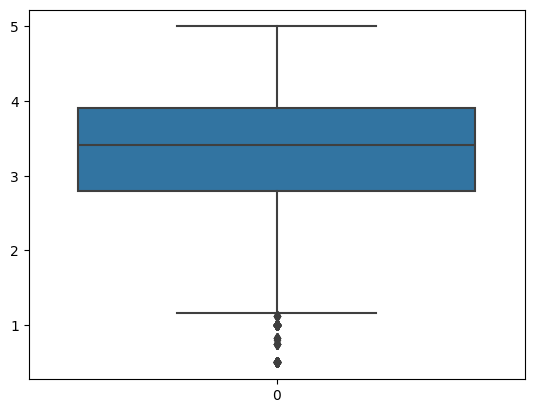

In [89]:
sns.boxplot(notass.nota.values)
